In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv(r'C:\Users\fabri\Desktop\my_repo\env\projects\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop(columns=['customerID'], inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [9]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [10]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(f"{col}: {df[col].unique()}")
        print("\n")

gender: ['Female' 'Male']


SeniorCitizen: [0 1]


Partner: ['Yes' 'No']


Dependents: ['No' 'Yes']


PhoneService: ['No' 'Yes']


MultipleLines: ['No phone service' 'No' 'Yes']


InternetService: ['DSL' 'Fiber optic' 'No']


OnlineSecurity: ['No' 'Yes' 'No internet service']


OnlineBackup: ['Yes' 'No' 'No internet service']


DeviceProtection: ['No' 'Yes' 'No internet service']


TechSupport: ['No' 'Yes' 'No internet service']


StreamingTV: ['No' 'Yes' 'No internet service']


StreamingMovies: ['No' 'Yes' 'No internet service']


Contract: ['Month-to-month' 'One year' 'Two year']


PaperlessBilling: ['Yes' 'No']


PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn: ['No' 'Yes']




In [11]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f"{col}: {len(df[df[col] == " "])}")
    print("\n")

tenure: 0


MonthlyCharges: 0


TotalCharges: 11




In [12]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"}).astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

EDA

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [18]:
def plot_distribution(df, columns_name):
    plt.figure(figsize=(10, 6))
    plt.subplot(1,2,1)
    sns.histplot(df[columns_name], kde = True)
    plt.title(f"Distribuzione di {columns_name}")
    
    col_mean = df[columns_name].mean()
    col_median = df[columns_name].median()
    plt.axvline(col_mean, color = 'red', linestyle = '--', label = 'Media')
    plt.axvline(col_median, color = 'blue', linestyle = '--', label = 'Mediana')
    
    plt.legend()
    
    plt.subplot(1,2,2)
    sns.boxplot(y = df[columns_name])
    plt.title(f"Boxplot di {columns_name}")
    plt.show()
    
    

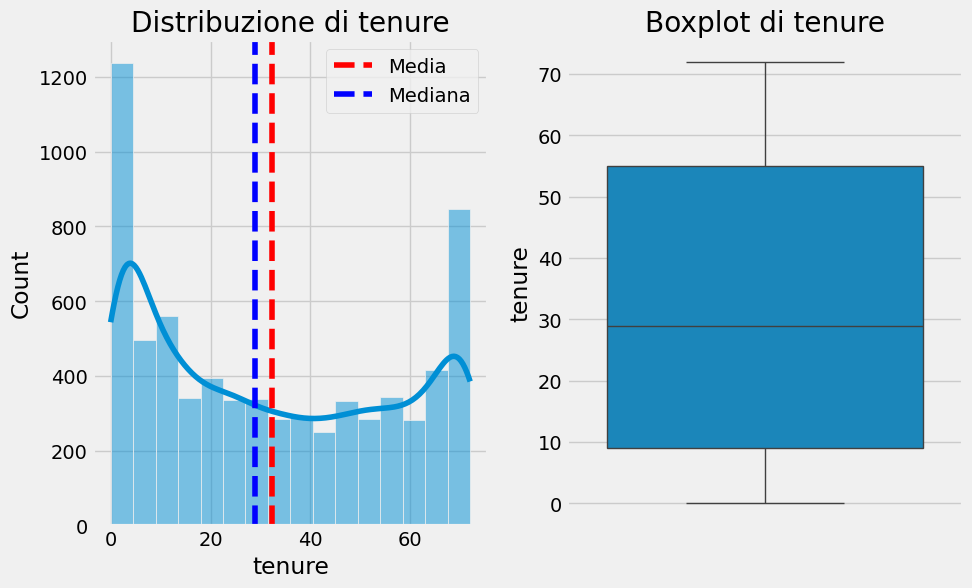

In [19]:
plot_distribution(df, 'tenure')

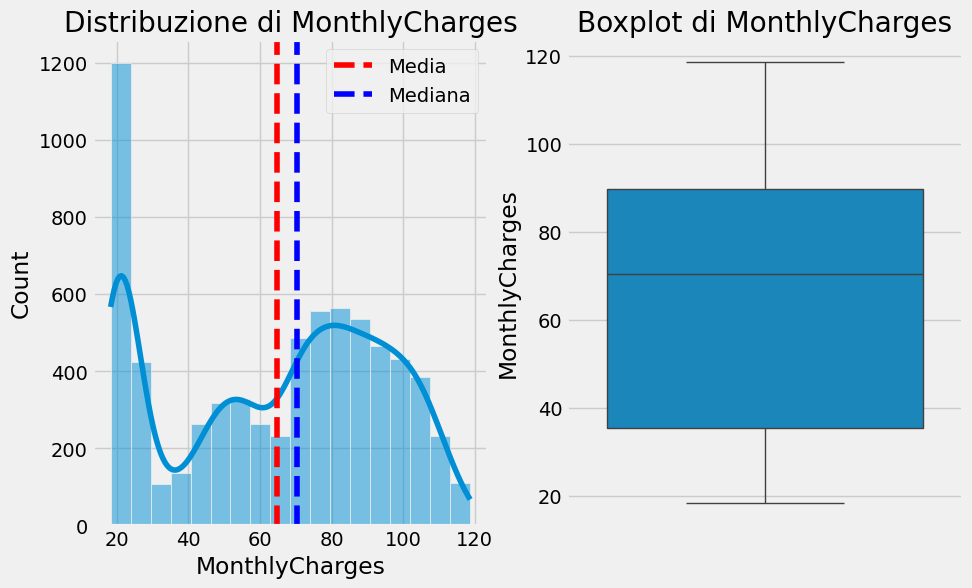

In [20]:
plot_distribution(df, 'MonthlyCharges')

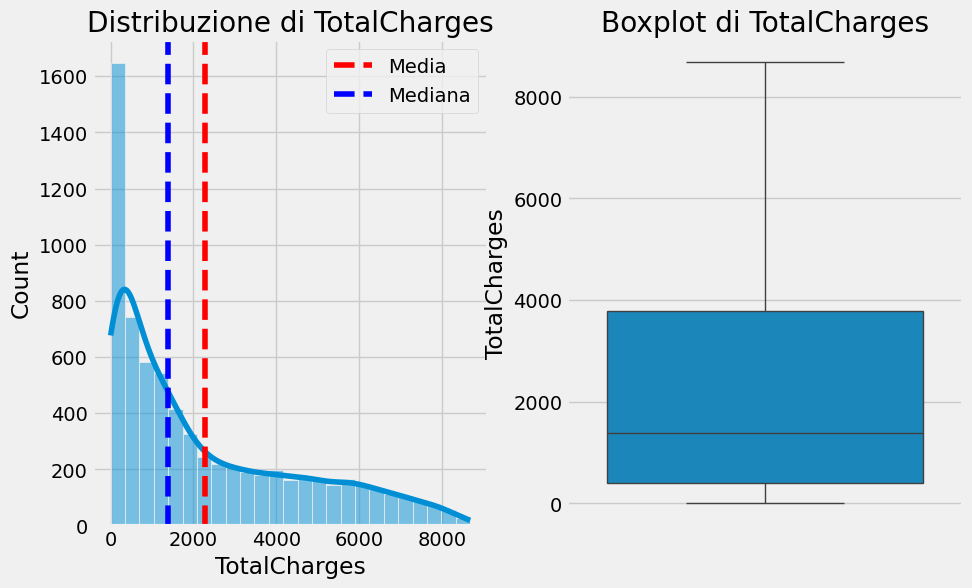

In [21]:
plot_distribution(df, 'TotalCharges')

Text(0.5, 1.0, 'Correlazione tra le variabili numeriche')

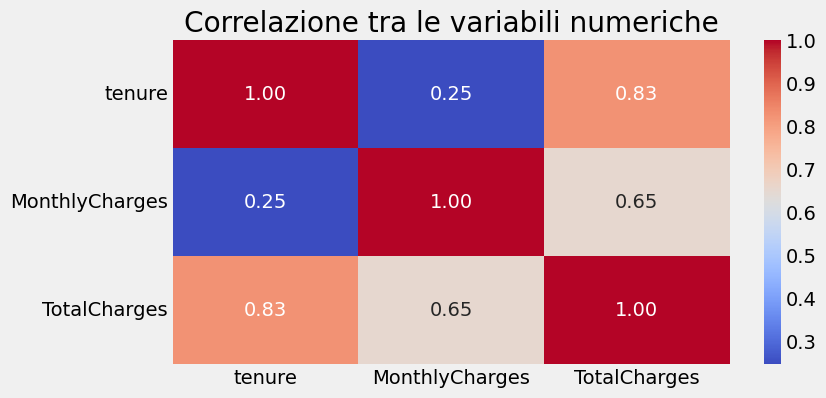

In [22]:
plt.figure(figsize = (8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlazione tra le variabili numeriche")

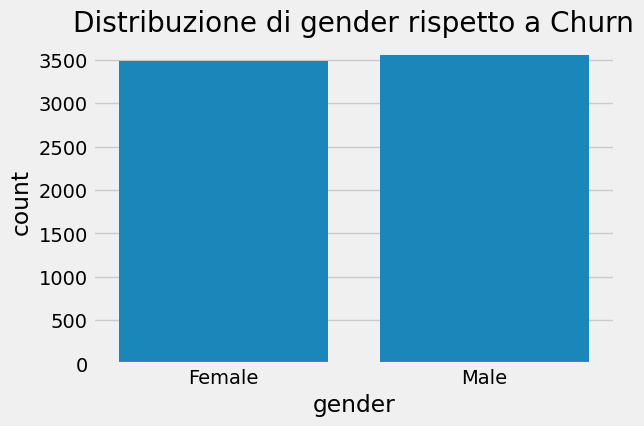

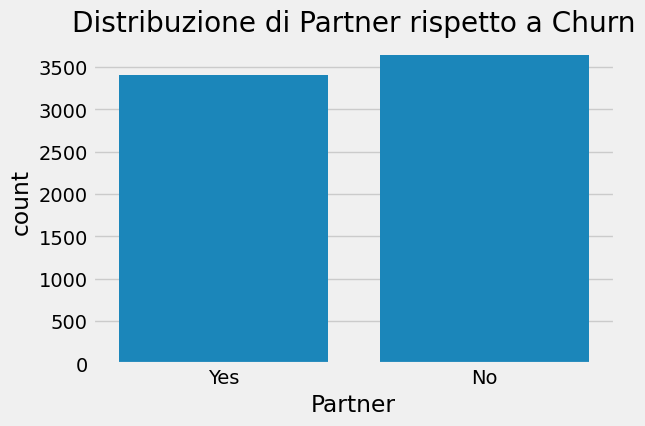

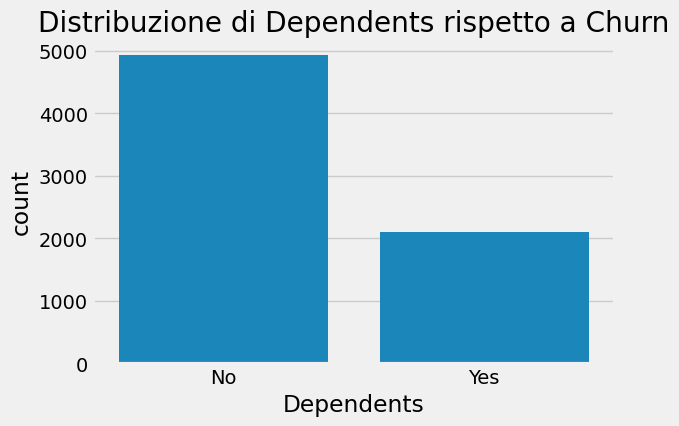

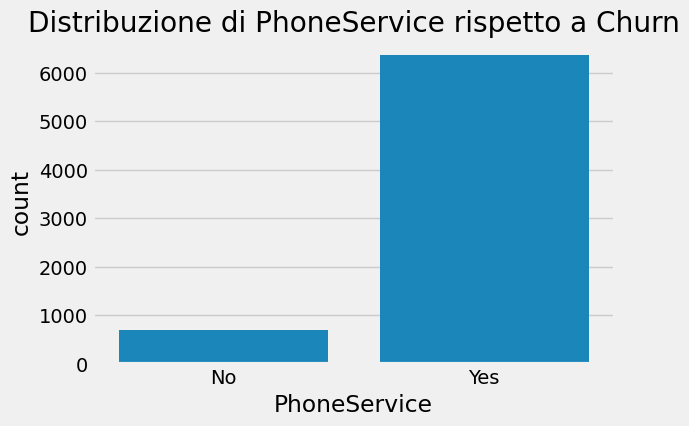

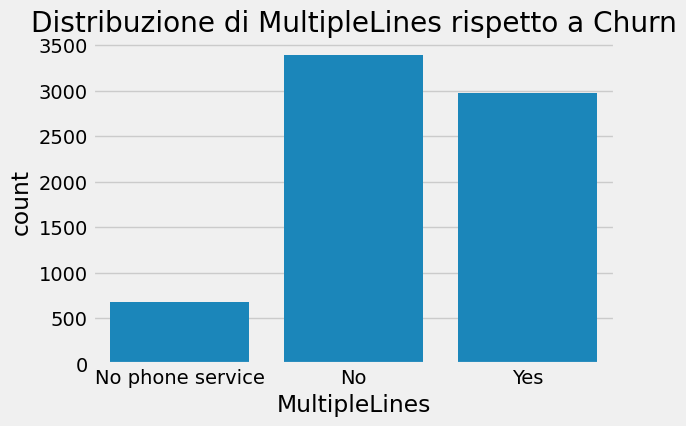

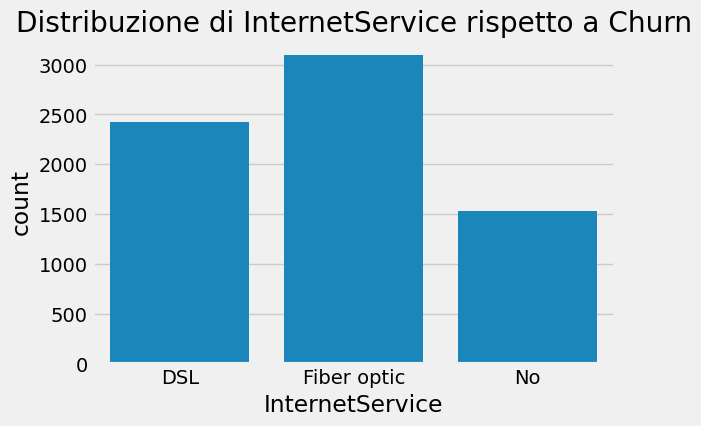

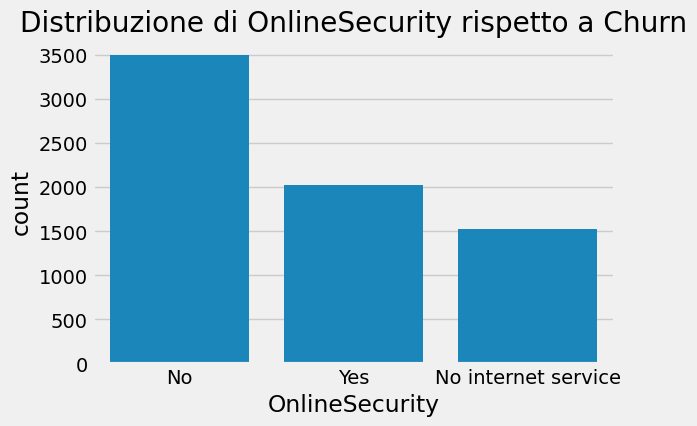

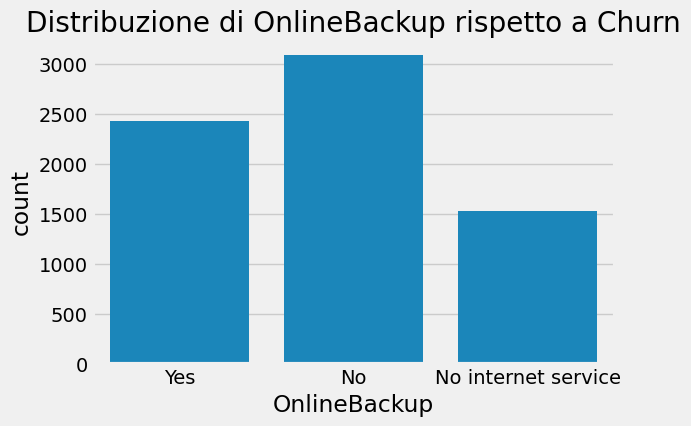

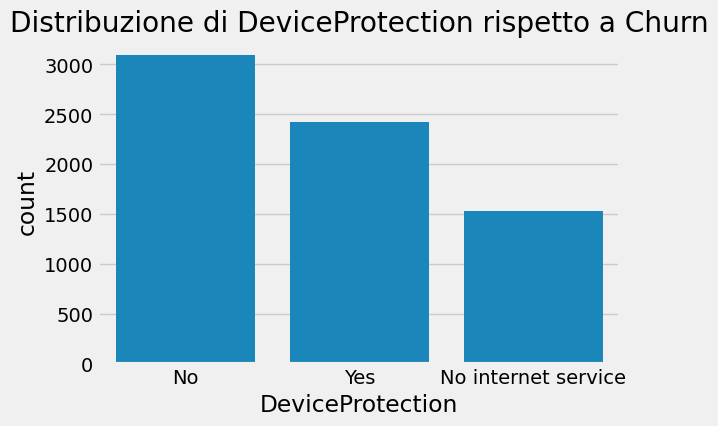

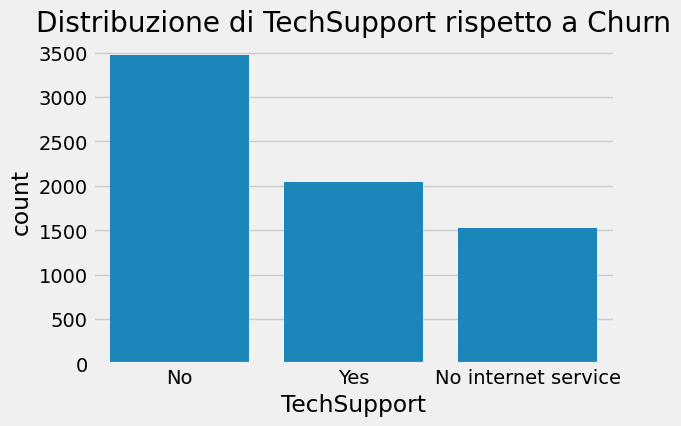

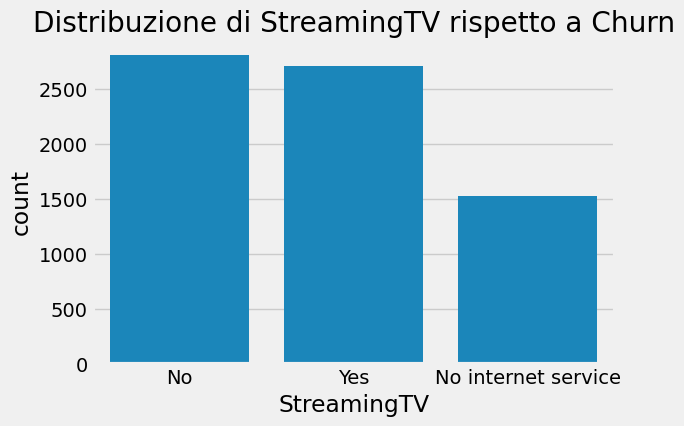

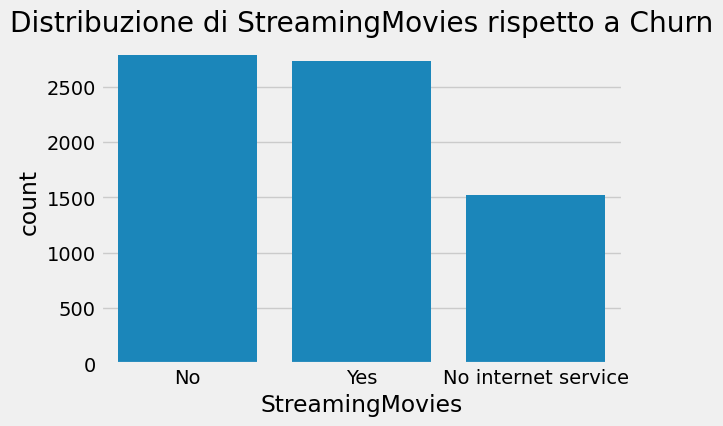

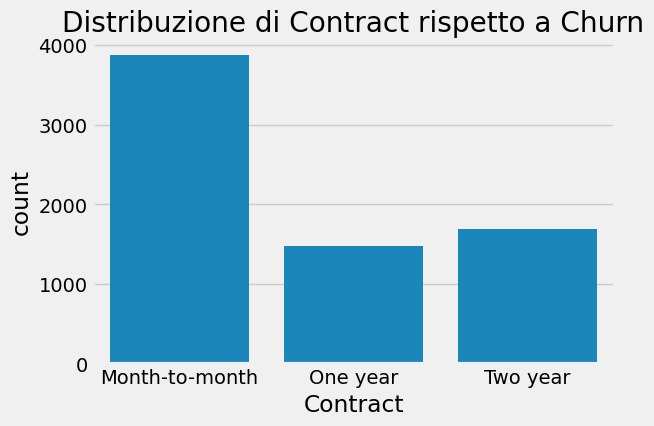

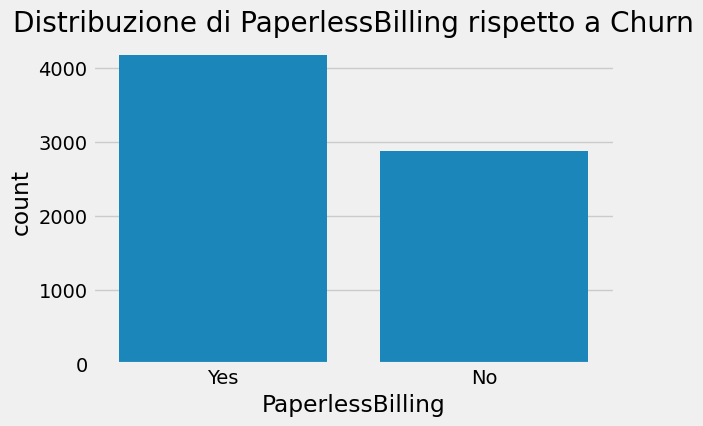

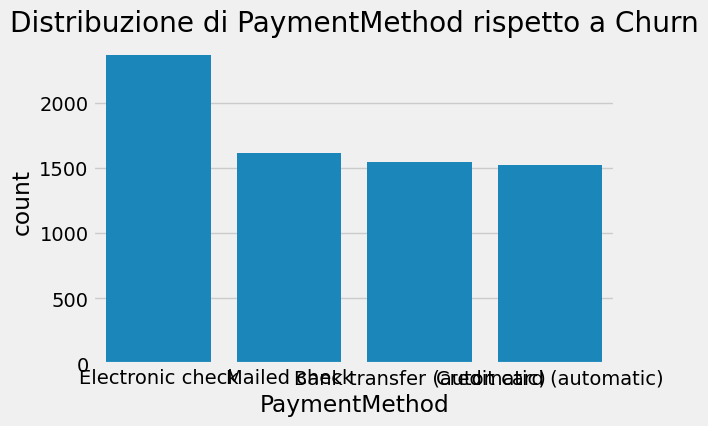

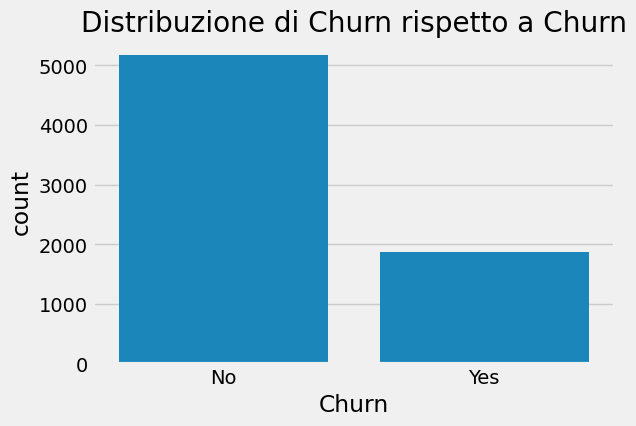

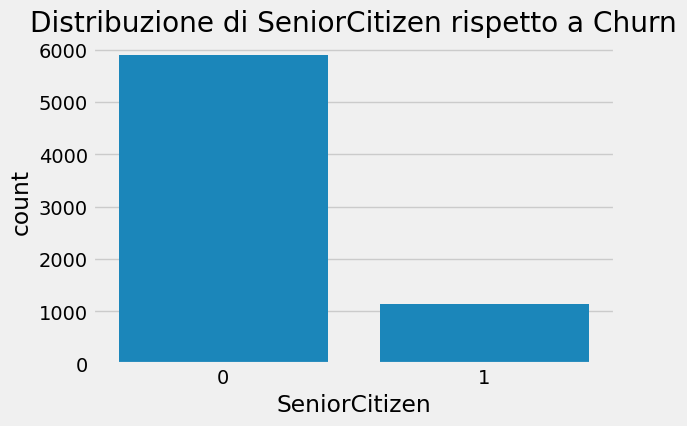

In [24]:
categorical_cols = df.select_dtypes(include = 'object').columns.tolist() + ["SeniorCitizen"]

for col in categorical_cols:
    plt.figure(figsize = (6, 4))
    #sns.countplot(data = df, x = col, hue = 'Churn')
    sns.countplot(x = df[col])
    plt.title(f"Distribuzione di {col} rispetto a Churn")
    plt.show()

In [25]:
# label encoding per le variabili categoriche
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

C:\Users\fabri\AppData\Local\Temp\ipykernel_11900\3768430038.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [26]:
objects_columns = df.select_dtypes(include = 'object').columns


In [27]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in objects_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [28]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [30]:
import pickle

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [31]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [39]:
X = df.drop(columns = ['Churn'])
y = df['Churn']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [44]:
smote = SMOTE(random_state = 42)


In [45]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [46]:
models = {
    "Random Forest" : RandomForestClassifier(random_state = 42),
    "XGBoost" : XGBClassifier(random_state = 42)
}

In [47]:
hyperparameters = {
    "Random Forest" : {
        "n_estimators" : [50, 100, 200],
        "max_depth" : [5, 10, None],
    },
    "XGBoost" : {
        "learnintg_rate" : [0.01, 0.1, 0.2],
        "max_depth" : [3, 5, 7],
    }
        
    }

In [48]:
best_models = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid = GridSearchCV(estimator = model, param_grid = hyperparameters[model_name], cv = 3, scoring = 'accuracy')
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] = grid.best_estimator_
    print(f"Miglior Accuracy per {model_name}: {grid.best_score_: .2f}")
    print(f"Migliori parametri per {model_name}: {grid.best_params_}")

Tuning Random Forest...
Miglior Accuracy per Random Forest:  0.83
Migliori parametri per Random Forest: {'max_depth': None, 'n_estimators': 100}
Tuning XGBoost...


c:\Users\fabri\Desktop\my_repo\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "learnintg_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\fabri\Desktop\my_repo\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "learnintg_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\fabri\Desktop\my_repo\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "learnintg_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\fabri\Desktop\my_repo\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "learnintg_rate" } are

Miglior Accuracy per XGBoost:  0.81
Migliori parametri per XGBoost: {'learnintg_rate': 0.01, 'max_depth': 7}


In [49]:
with open('best_models.pkl', 'wb') as f:
    pickle.dump(best_models["Random Forest"], f)

In [50]:
with open("scaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)

In [51]:
y_test_pred = best_models["Random Forest"].predict(X_test)
y_test_pred_proba = best_models["Random Forest"].predict_proba(X_test)[:, 1]

In [55]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred): .2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_pred_proba): .2f}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy:  0.78
ROC AUC:  0.83
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.56      0.67      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

[[844 192]
 [124 249]]


In [56]:
xg_y_test_pred = best_models["XGBoost"].predict(X_test)
xg_y_test_pred_proba = best_models["XGBoost"].predict_proba(X_test)[:, 1]


In [58]:
print(f"Accuracy: {accuracy_score(y_test, xg_y_test_pred): .2f}")
print(f"ROC AUC: {roc_auc_score(y_test, xg_y_test_pred_proba): .2f}")
print(classification_report(y_test, xg_y_test_pred))
print(confusion_matrix(y_test, xg_y_test_pred))

Accuracy:  0.77
ROC AUC:  0.82
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.55      0.67      0.61       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

[[834 202]
 [122 251]]


Accuracy 77% delle predizioni corrette
ROC AUC 0.82 il modello ha un'ottima capacità di separare le due classi (sopra l'80% è buono)

Il modello fa fatica a riconoscere la classe positiva

834 negativi classificati correttamente
202 negativi sbagliati

122 positivi sbagliati
251 positivi predetti correttamente

In [59]:
with open('best_models.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
with open("encoders.pkl", 'rb') as f:
    encoders = pickle.load(f)
with open("scaler.pkl", 'rb') as f:
    scaler_data = pickle.load(f)

    

In [60]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    return "Churn" if prediction == 1 else "No Churn", probability

In [75]:
example_input = {
    "gender" : "Female",
    "SeniorCitizen" : 0,
    "Partner" : "Yes",
    "Dependents" : "No",
    "tenure" : 1,
    "PhoneService" : "No",
    "MultipleLines" : "No phone service",
    "InternetService" : "DSL",
    "OnlineSecurity" : "No",
    "OnlineBackup" : "Yes",
    "DeviceProtection" : "No",
    "TechSupport" : "No",
    "StreamingTV" : "No",
    "StreamingMovies" : "No",
    "Contract" : "Month-to-month",
    "PaperlessBilling" : "Yes",
    "PaymentMethod" : "Electronic check",
    "MonthlyCharges" : 29.85,
    "TotalCharges" : 29.85
}

In [76]:
prediction, prob = make_prediction(example_input)
print(f"Predizione: {prediction}, Probabilità: {prob:.2f}")

Predizione: No Churn, Probabilità: 0.26
